**Inverse_kinematic_functions(from repository)**

In [116]:
import math 
def scara_invkin(x,y,z,d1,d2):
    # using formulae from the textbook
    r = abs((x**2+y**2-d1**2-d2**2)/(2*d1*d2))
    theta2 = np.arctan(np.sqrt(abs(1-r**2))/r)
    theta1 = np.arctan(y/x) - np.arctan((d2*np.sin(theta2))/(d1+d2*np.cos(theta2)))
    d3 = -z
    # converting from radians to degrees
    theta1 = theta1
    theta2 = theta2
    return theta1,theta2,d3


def stanford_invkin(endeffector_position,lengthsoflinks):
    theta1 = np.arctan(endeffector_position[1]/endeffector_position[0])
    r = np.sqrt(endeffector_position[0]**2 + endeffector_position[1]**2)
    s = endeffector_position[2] - lengthsoflinks[0]
    theta2 = np.arctan(s/r)
    d3 = np.sqrt(r**2 + s**2) - lengthsoflinks[1]
    return theta1, theta2, d3

def PUMA_invkin(l1,l2,l3,xc,yc,zc):
    theta1 = math.atan2(yc,xc)
    D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (math.atan2((-math.sqrt(1-D*D)),D))
    theta2 = math.atan2(zc-l1,(math.sqrt(xc*xc+yc*yc)))-math.atan2((l3*math.sin(theta3)),(l2+l3*math.cos(theta3)))
    theta3 = theta3
    return theta1,theta2,theta3

**Q3-SCARA ROBOT**

**Scara dynamics**

In [95]:
# Import sympy
from sympy import *
import numpy as np

l1=10
l2=10
d=10
m1=10
m2=10
m3=10
I1 = m1*(l1**2)/3
I2 = m2*(l2**2)/3

q1, q2, q3=symbols("q1 q2 q3")

J_vc1 = np.array([[(-l1/2)*sin(q1), 0, 0],[(l1/2)*cos(q1), 0, 0],[0, 0, 0]])
J_vc2 = np.array([[-l1*sin(q1)-(l2/2)*sin(q1+q2), (-l2/2)*sin(q1+q2), 0],[l1*cos(q1)+(l2/2)*cos(q1+q2), (l2/2)*cos(q1+q2), 0],[0, 0, 0]])
J_vc3 = np.array([[-l1*sin(q1)-l2*sin(q1+q2), l2*sin(q1+q2), 0],[l1*cos(q1)+l2*cos(q1+q2), l2*cos(q1+q2), 0],[0, 0, -1/2]])

d1=m1*np.matmul(np.transpose(J_vc1), J_vc1)
d2=m2*np.matmul(np.transpose(J_vc2), J_vc2)
d3=m3*np.matmul(np.transpose(J_vc3), J_vc3)

d_sum=np.add(np.add(d1,d2),d3)
I_sum=np.array([[I1+I2, I2, 0],[I2, I2, 0],[0, 0, 0]])
D_q= simplify(np.add(d_sum,I_sum))
print("D_q =",D_q,"\n")

q=np.array([q1,q2,q3])

c = [[[0,0,0],[0,0,0],[0,0,0]],[[0,0,0],[0,0,0],[0,0,0]],[[0,0,0],[0,0,0],[0,0,0]]]

# Calculating Christoffer Symbols
for k in range(0,3):
  for j in range(0,3):
    for i in range(0,3):
      c[i][j][k] = 0.5 * (diff(D_q[k][j], q[i]) + diff(D_q[k][i], q[j]) - diff(D_q[i][j], q[k]))
    
V_q = 13 * sin(q[0]) + 45 * (5 * sin(q[0]) + 3 * sin(q[0]))

Phi = [0] * 3
ct = 0
d=0
T = [0] * 3
q1d, q1dd, q2d, q2dd, q3d,q3dd = symbols("q1d q1dd q2d q2dd q3d q3dd")
qad = np.array([q1d, q2d, q3d])
qadd = np.array([q1dd, q2dd, q3dd])
for k in range(3): #corresponds to each link
      Phi[k] = diff(V_q, q[k])
      for j in range(3):
        d = d + D_q[k][j] * qadd[j] 
        for i in range(3):
          # print("i =",i,c[i][j][k])
          ct = ct + c[i][j][k] * qad[i] * qad[j]
          # print("ct =", ct)
      T[k] = d + ct + Phi[k]
      print("T(",k+1,") =",simplify(T[k]),"\n")   



D_q = [[3000.0*cos(q2) + 4166.66666666667, 500.0*cos(q2) + 1000.0*cos(2*q1 + q2) + 1000.0*cos(2*q1 + 2*q2) + 583.333333333333, 0], [500.0*cos(q2) + 1000.0*cos(2*q1 + q2) + 1000.0*cos(2*q1 + 2*q2) + 583.333333333333, 1583.33333333333, 0], [0, 0, 2.5]] 

T( 1 ) = -3000.0*q1d*q2d*sin(q2) + q1dd*(3000.0*cos(q2) + 4166.66666666667) - q2d**2*(500.0*sin(q2) + 1000.0*sin(2*q1 + q2) + 2000.0*sin(2*q1 + 2*q2)) + q2dd*(500.0*cos(q2) + 1000.0*cos(2*q1 + q2) + 1000.0*cos(2*q1 + 2*q2) + 583.333333333333) + 373*cos(q1) 

T( 2 ) = 1500.0*q1d**2*sin(q2) - 2000.0*q1d**2*sin(2*q1 + q2) - 2000.0*q1d**2*sin(2*q1 + 2*q2) - 3000.0*q1d*q2d*sin(q2) + 3500.0*q1dd*cos(q2) + 1000.0*q1dd*cos(2*q1 + q2) + 1000.0*q1dd*cos(2*q1 + 2*q2) + 4750.0*q1dd - 500.0*q2d**2*sin(q2) - 1000.0*q2d**2*sin(2*q1 + q2) - 2000.0*q2d**2*sin(2*q1 + 2*q2) + 500.0*q2dd*cos(q2) + 1000.0*q2dd*cos(2*q1 + q2) + 1000.0*q2dd*cos(2*q1 + 2*q2) + 2166.66666666667*q2dd 

T( 3 ) = 1500.0*q1d**2*sin(q2) - 2000.0*q1d**2*sin(2*q1 + q2) - 2000.0*q1d**2*

In [ ]:
!pip install slycot
!pip install control

In [15]:
%matplotlib inline

import numpy as np
import sympy
import seaborn as sns
import matplotlib.pyplot as plt
import control.matlab as control

**Scara PI control**

(0.14017020661863505, 0.895664793857865, -1)
Theta_m = 
            0.007856 s + 0.1262
-------------------------------------------
0.0006988 s^3 + 0.0154 s^2 + 0.224 s + 0.72

Theta_m = 
             0.1253 s + 0.5374
-------------------------------------------
0.0005621 s^3 + 0.0154 s^2 + 0.168 s + 0.48

Theta_m = 
              -0.4292 s - 0.9
-------------------------------------------
0.0004003 s^3 + 0.0154 s^2 + 0.268 s + 0.72



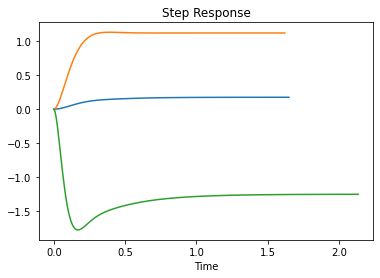

In [244]:
# desired Point 1
xd = [15,10,1]
theta1_ds= scara_invkin(xd[0],xd[1],xd[2],l1,l2)
print(theta1_ds)

def PI_control(K,Kp,Ki,J_eff,B_eff,r,d,theta_d):
  nu1 = [Kp*theta_d-r*d, Ki*theta_d]
  omega1_s = [J_eff, B_eff, K*Kp, K*Ki]
  TF_close1=control.tf(nu1, omega1_s)
  print("Theta_m =",TF_close1)
  
  y1,t1 = control.step(TF_close1)
  plt.plot(t1,y1)
  plt.xlabel('Time')
  plt.title('Step Response')
  

D_q_v=[[0,0,0],[0,0,0],[0,0,0]]

for i in range(3):
  for j in range(3):
    f = D_q[i][j]
    f1 = lambdify([q1,q2,q3],f)
    D_q_v[i][j] = f1(1,2,1)
# print(D_q_v)

# for link1
K = 0.8
Bm = 0.015
Jm = 0.0004
kb = 0.0002

# for link1
r = 0.00032
dkk=D_q_v[0][0]
J_eff = Jm + (r**2)*dkk
B_eff = Bm + kb*k
d=m1*9.81
theta_d1 = theta1_ds[0]

Kp_1=0.28
Ki_1=0.9

PI_control(K,Kp_1,Ki_1,J_eff,B_eff,r,d,theta_d1)

# for link2
r = 0.00032
dkk=D_q_v[1][1]
J_eff = Jm + (r**2)*dkk
B_eff = Bm + kb*k
d=(m1+m2)*9.81
theta_d2 = theta1_ds[1]

Kp_2=0.21
Ki_2=0.6

PI_control(K,Kp_2,Ki_2,J_eff,B_eff,r,d,theta_d2)

# for link3
r = 0.00032
dkk=D_q_v[2][2]
J_eff = Jm + (r**2)*dkk
B_eff = Bm + kb*k
d=(m1+m2+m3)*9.81
theta_d3 = theta1_ds[2]

Kp_3=0.335
Ki_3=0.9

PI_control(K,Kp_3,Ki_3,J_eff,B_eff,r,d,theta_d3)

(0.3601361882620042, 0.48430231574591986, -0.9)
Theta_m = 
            0.08385 s + 0.3061
-------------------------------------------
0.0006988 s^3 + 0.0154 s^2 + 0.256 s + 0.68

Theta_m = 
             0.02923 s + 0.2809
--------------------------------------------
0.0005621 s^3 + 0.0154 s^2 + 0.152 s + 0.464

Theta_m = 
             -0.4722 s - 1.08
-------------------------------------------
0.0004003 s^3 + 0.0154 s^2 + 0.336 s + 0.96



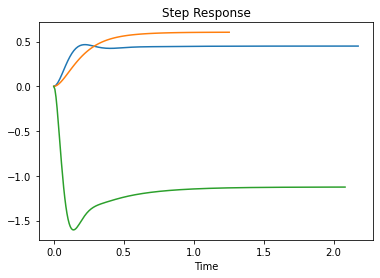

In [258]:
# desired Point 2
xd = [16,11,0.9]
theta1_ds= scara_invkin(xd[0],xd[1],xd[2],l1,l2)
print(theta1_ds)

def PI_control(K,Kp,Ki,J_eff,B_eff,r,d,theta_d):
  nu1 = [Kp*theta_d-r*d, Ki*theta_d]
  omega1_s = [J_eff, B_eff, K*Kp, K*Ki]
  TF_close1=control.tf(nu1, omega1_s)
  print("Theta_m =",TF_close1)
  
  y1,t1 = control.step(TF_close1)
  plt.plot(t1,y1)
  plt.xlabel('Time')
  plt.title('Step Response')
  

D_q_v=[[0,0,0],[0,0,0],[0,0,0]]

for i in range(3):
  for j in range(3):
    f = D_q[i][j]
    f1 = lambdify([q1,q2,q3],f)
    D_q_v[i][j] = f1(1,2,1)
# print(D_q_v)

# for link1
K = 0.8
Bm = 0.015
Jm = 0.0004
kb = 0.0002

# for link1
r = 0.00032
dkk=D_q_v[0][0]
J_eff = Jm + (r**2)*dkk
B_eff = Bm + kb*k
d=m1*9.81
theta_d1 = theta1_ds[0]

Kp_1=0.32
Ki_1=0.85

PI_control(K,Kp_1,Ki_1,J_eff,B_eff,r,d,theta_d1)

# for link2
r = 0.00032
dkk=D_q_v[1][1]
J_eff = Jm + (r**2)*dkk
B_eff = Bm + kb*k
d=(m1+m2)*9.81
theta_d2 = theta1_ds[1]

Kp_2=0.19
Ki_2=0.58

PI_control(K,Kp_2,Ki_2,J_eff,B_eff,r,d,theta_d2)

# for link3
r = 0.00032
dkk=D_q_v[2][2]
J_eff = Jm + (r**2)*dkk
B_eff = Bm + kb*k
d=(m1+m2+m3)*9.81
theta_d3 = theta1_ds[2]

Kp_3=0.42
Ki_3=1.2

PI_control(K,Kp_3,Ki_3,J_eff,B_eff,r,d,theta_d3)

**STANFORD MANIPULATOR**

**Stanford dynamics**

In [32]:
l1=12
l2=10
d=5
m1=5
m2=8
m3=7
I1 = 0
I2 = m2*(l2**2)/3

q1, q2, q3=symbols("q1 q2 q3")

J_vc1 = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]])
J_vc2 = np.array([[-(l2/2)*sin(q1)*cos(q2), (-l2/2)*cos(q1)*sin(q2), 0],[(l2/2)*cos(q1)*cos(q2), -(l2/2)*sin(q1)*sin(q2), 0],[0, (l2/2)*cos(q2), 0]])
J_vc3 = np.array([[-((d/2)+l2)*sin(q1)*cos(q2), -((d/2)+l2)*cos(q1)*sin(q2), 0.5*cos(q1)*cos(q2)],[((d/2)+l2)*cos(q1)*cos(q2), -((d/2)+l2)*sin(q1)*sin(q2), 0.5*sin(q1)*cos(q2)],[0, (l2+(d/2))*cos(q2), 0.5*sin(q2)]])

d1=m1*np.matmul(np.transpose(J_vc1), J_vc1)
d2=m2*np.matmul(np.transpose(J_vc2), J_vc2)
d3=m3*np.matmul(np.transpose(J_vc3), J_vc3)

d_sum=np.add(np.add(d1,d2),d3)
I_sum=np.array([[I1+I2, 0, 0],[0, I2, 0],[0, 0, 0]])
D_q= simplify(np.add(d_sum,I_sum))
print("D_q =",D_q,"\n")

q=np.array([q1,q2,q3])

c = [[[0,0,0],[0,0,0],[0,0,0]],[[0,0,0],[0,0,0],[0,0,0]],[[0,0,0],[0,0,0],[0,0,0]]]

# Calculating Christoffer Symbols
for k in range(0,3):
  for j in range(0,3):
    for i in range(0,3):
      c[i][j][k] = 0.5 * (diff(D_q[k][j], q[i]) + diff(D_q[k][i], q[j]) - diff(D_q[i][j], q[k]))
    
V_q = 13 * sin(q[0]) + 45 * (5 * sin(q[0]) + 3 * sin(q[0]))

Phi = [0] * 3
ct = 0
d=0
T = [0] * 3
q1d, q1dd, q2d, q2dd, q3d,q3dd = symbols("q1d q1dd q2d q2dd q3d q3dd")
qad = np.array([q1d, q2d, q3d])
qadd = np.array([q1dd, q2dd, q3dd])
for k in range(3): #corresponds to each link
      Phi[k] = diff(V_q, q[k])
      for j in range(3):
        d = d + D_q[k][j] * qadd[j] 
        for i in range(3):
          # print("i =",i,c[i][j][k])
          ct = ct + c[i][j][k] * qad[i] * qad[j]
          # print("ct =", ct)
      T[k] = d + ct + Phi[k]
      print("T(",k+1,") =",simplify(T[k]),"\n")

D_q = [[1560.41666666667 - 1293.75*sin(q2)**2, 0, 0], [0, 1560.41666666667, 0], [0, 0, 1.75]] 

T( 1 ) = -1293.75*q1d*q2d*sin(2*q2) - q1dd*(1293.75*sin(q2)**2 - 1560.41666666667) + 373*cos(q1) 

T( 2 ) = 646.875*q1d**2*sin(2*q2) - 1293.75*q1d*q2d*sin(2*q2) - q1dd*(1293.75*sin(q2)**2 - 1560.41666666667) + 1560.41666666667*q2dd 

T( 3 ) = 646.875*q1d**2*sin(2*q2) - 1293.75*q1d*q2d*sin(2*q2) - q1dd*(1293.75*sin(q2)**2 - 1560.41666666667) + 1560.41666666667*q2dd + 1.75*q3dd 



**Stanford PI control**

(0.844153986113171, -0.393564135328064, 3.0384048104052983)
Theta_m = 
            0.4861 s + 0.00015
-------------------------------------------
0.03388 s^3 + 0.0154 s^2 + 0.64 s + 0.00012

Theta_m = 
           0.4361 s + 0.00025
-----------------------------------------
0.03388 s^3 + 0.0154 s^2 + 0.6 s + 0.0002

Theta_m = 
            0.3361 s + 0.00015
-------------------------------------------
0.03388 s^3 + 0.0154 s^2 + 0.52 s + 0.00012



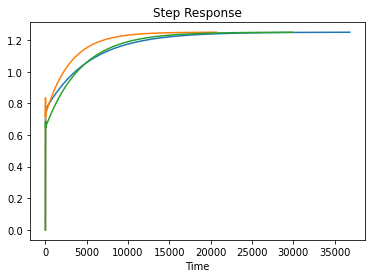

In [111]:
# point1
xd = [8,9,5]
theta_ds= stanford_invkin(xd,[l1,l2])
print(theta_ds)

def PI_control(K,Kp,Ki,J_eff,B_eff,r,d,theta_d):
  nu1 = [Kp*theta_d-r*d, Ki*theta_d]
  omega1_s = [J_eff, B_eff, K*Kp, K*Ki]
  TF_close1=control.tf(nu1, omega1_s)
  print("Theta_m =",TF_close1)

  y1,t1 = control.step(TF_close1)
  plt.plot(t1,y1)
  plt.xlabel('Time')
  plt.title('Step Response')

D_q_v=[[0,0,0],[0,0,0],[0,0,0]]

for i in range(3):
  for j in range(3):
    f = D_q[i][j]
    f1 = lambdify([q1,q2,q3],f)
    D_q_v[i][j] = f1(1,2,1)
# print(D_q_v)

# for link1
K = 0.8
Bm = 0.015
Jm = 0.004
kb = 0.0002

# for link1
r = 0.0032
dkk=D_q_v[0][0]
J_eff = Jm + (r**2)*dkk
B_eff = Bm + kb*k
(m1)*9.81
theta_d = 1

Kp_1= 0.8
Ki_1= 0.00015

Kp_2=0.75
Ki_2=0.00025

Kp_3=0.65
Ki_3=0.00015

PI_control(K,Kp_1,Ki_1,J_eff,B_eff,r,d,theta_d)
PI_control(K,Kp_2,Ki_2,J_eff,B_eff,r,d,theta_d)
PI_control(K,Kp_3,Ki_3,J_eff,B_eff,r,d,theta_d)


**Q2.4 PUMA Manipulator**

**Puma Dynamics**

In [41]:
l1=12
l2=10
l3=7
m1=5
m2=8
m3=7
I1 = 0
I2 = m2*(l2**2)/3
I3 = m3*(l3**2)/3

q1, q2, q3=symbols("q1 q2 q3")

J_vc1 = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]])
J_vc2 = np.array([[-(l2/2)*sin(q1)*cos(q2), (-l2/2)*cos(q1)*sin(q2), 0],[(l2/2)*cos(q1)*cos(q2), -(l2/2)*sin(q1)*sin(q2), 0],[0, (l2/2)*cos(q2), 0]])
J_vc3 = np.array([[-((l3/2)*cos(q3)+l2)*sin(q1)*cos(q2), -((l3/2)*cos(q3)+l2)*cos(q1)*sin(q2), 0.5*l3*cos(q1)*cos(q2)*sin(q3)],[((l3/2)*cos(q3)+l2)*cos(q1)*cos(q2), -((l3/2)*cos(q3)+l2)*sin(q1)*sin(q2), 0.5*l3*sin(q1)*cos(q2)*sin(q3)],[0, l2*cos(q2), 0.5*l3*cos(q2)]])

d1=m1*np.matmul(np.transpose(J_vc1), J_vc1)
d2=m2*np.matmul(np.transpose(J_vc2), J_vc2)
d3=m3*np.matmul(np.transpose(J_vc3), J_vc3)

d_sum=np.add(np.add(d1,d2),d3)
I_sum=np.array([[I1+I2+I3, 0, 0],[0, I2+I3, I3],[0, I3, I3]])
D_q= simplify(np.add(d_sum,I_sum))
print("D_q =",D_q,"\n")

q=np.array([q1,q2,q3])

c = [[[0,0,0],[0,0,0],[0,0,0]],[[0,0,0],[0,0,0],[0,0,0]],[[0,0,0],[0,0,0],[0,0,0]]]

# Calculating Christoffer Symbols
for k in range(0,3):
  for j in range(0,3):
    for i in range(0,3):
      c[i][j][k] = 0.5 * (diff(D_q[k][j], q[i]) + diff(D_q[k][i], q[j]) - diff(D_q[i][j], q[k]))
    
V_q = 13 * sin(q[0]) + 45 * (5 * sin(q[0]) + 3 * sin(q[0]))

Phi = [0] * 3
ct = 0
d=0
T = [0] * 3
q1d, q1dd, q2d, q2dd, q3d,q3dd = symbols("q1d q1dd q2d q2dd q3d q3dd")
qad = np.array([q1d, q2d, q3d])
qadd = np.array([q1dd, q2dd, q3dd])
for k in range(3): #corresponds to each link
      Phi[k] = diff(V_q, q[k])
      for j in range(3):
        d = d + D_q[k][j] * qadd[j] 
        for i in range(3):
          # print("i =",i,c[i][j][k])
          ct = ct + c[i][j][k] * qad[i] * qad[j]
          # print("ct =", ct)
      T[k] = d + ct + Phi[k]
      print("T(",k+1,") =",simplify(T[k]),"\n")

D_q = [[85.75*cos(q2)**2*cos(q3)**2 + 490.0*cos(q2)**2*cos(q3) + 900.0*cos(q2)**2 + 381.0, 0, 0], [0, -85.75*sin(q2)**2*sin(q3)**2 + 490.0*sin(q2)**2*cos(q3) + 85.75*sin(q2)**2 + 1281.0, 122.5*cos(2*q2) - 10.71875*cos(2*q2 - 2*q3) - 61.25*cos(2*q2 - q3) + 61.25*cos(2*q2 + q3) + 10.71875*cos(2*q2 + 2*q3) + 236.833333333333], [0, 122.5*cos(2*q2) - 10.71875*cos(2*q2 - 2*q3) - 61.25*cos(2*q2 - q3) + 61.25*cos(2*q2 + q3) + 10.71875*cos(2*q2 + 2*q3) + 236.833333333333, -85.75*cos(q2)**2*cos(q3)**2 + 171.5*cos(q2)**2 + 114.333333333333]] 

T( 1 ) = -2*q1d*q2d*(85.75*cos(q3)**2 + 490.0*cos(q3) + 900.0)*sin(q2)*cos(q2) - 2*q1d*q3d*(85.75*cos(q3) + 245.0)*sin(q3)*cos(q2)**2 + q1dd*(85.75*cos(q2)**2*cos(q3)**2 + 490.0*cos(q2)**2*cos(q3) + 900.0*cos(q2)**2 + 381.0) + 373*cos(q1) 

T( 2 ) = q1d**2*(85.75*cos(q3)**2 + 490.0*cos(q3) + 900.0)*sin(q2)*cos(q2) - 2*q1d*q2d*(85.75*cos(q3)**2 + 490.0*cos(q3) + 900.0)*sin(q2)*cos(q2) - 2*q1d*q3d*(85.75*cos(q3) + 245.0)*sin(q3)*cos(q2)**2 + q1dd*(85.75*cos(q

**Puma PI control**

(0.844153986113171, 0.16598161890435525, -1.4202280540182106)
Theta_m = 
            -0.03392 s + 0.02
-----------------------------------------
0.03388 s^3 + 0.019 s^2 + 0.112 s + 0.008

Theta_m = 
            -0.05392 s + 0.03
-----------------------------------------
0.03388 s^3 + 0.019 s^2 + 0.104 s + 0.012

Theta_m = 
            -0.02992 s + 0.024
-------------------------------------------
0.03388 s^3 + 0.019 s^2 + 0.1136 s + 0.0096



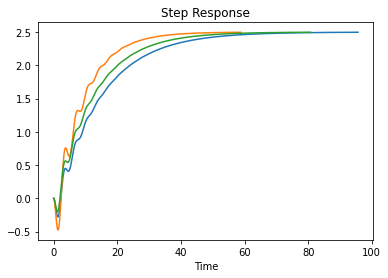

In [158]:
xd = [8,9,5]
theta_ds= PUMA_invkin(l1,l2,l3,xd[0],xd[1],xd[2])
print(theta_ds)

def PI_control(K,Kp,Ki,J_eff,B_eff,r,d,theta_d):
  nu1 = [Kp*theta_d-r*d, Ki*theta_d]
  omega1_s = [J_eff, B_eff, K*Kp, K*Ki]
  TF_close1=control.tf(nu1, omega1_s)
  print("Theta_m =",TF_close1)

  y1,t1 = control.step(TF_close1)
  plt.plot(t1,y1)
  plt.xlabel('Time')
  plt.title('Step Response')

D_q_v=[[0,0,0],[0,0,0],[0,0,0]]

for i in range(3):
  for j in range(3):
    f = D_q[i][j]
    f1 = lambdify([q1,q2,q3],f)
    D_q_v[i][j] = f1(1,2,1)
# print(D_q_v)

# for link1
K = 0.8
Bm = 0.015
Jm = 0.004
kb = 0.002

# for link1
r = 0.0032
dkk=D_q_v[0][0]
J_eff = Jm + (r**2)*dkk
B_eff = Bm + kb*k
d=(m1)*9.81
theta_d = 2.0

Kp_1= 0.14
Ki_1= 0.01

Kp_2=0.13
Ki_2=0.015

Kp_3=0.142
Ki_3=0.012
PI_control(K,Kp_1,Ki_1,J_eff,B_eff,r,d,theta_d)
PI_control(K,Kp_2,Ki_2,J_eff,B_eff,r,d,theta_d)
PI_control(K,Kp_3,Ki_3,J_eff,B_eff,r,d,theta_d)
